In [2]:
import os
import sys
import numpy as np
from datetime import datetime, timezone
import pickle
import seaborn as sns
sys.path.append('/home/yutao4/Sat_Simulator/')
os.chdir('/home/yutao4/Sat_Simulator/')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme()
def plot_energy_vs_time(time_energy_list, window_size=10, ax=None, name=""):
    # Create a dictionary where the keys are the time steps and the values are the total energy cost at that time step
    time_energy_dict = {}
    for t, e in time_energy_list:
        t= int(t)
        if t in time_energy_dict:
            time_energy_dict[t] += e
        else:
            time_energy_dict[t] = e

    # Find the minimum and maximum time steps in the data
    min_time_step = min(time_energy_dict.keys())
    max_time_step = max(time_energy_dict.keys())

    # Create a list of all time steps with corresponding energy costs (0 if missing)
    time_steps = []
    energy_costs = []
    for t in range(min_time_step, max_time_step+1):
        if t in time_energy_dict:
            time_steps.append(t)
            energy_costs.append(time_energy_dict[t])
        else:
            time_steps.append(t)
            energy_costs.append(0)

    # Calculate the moving average with the specified window size
    energy_costs_moving_avg = pd.Series(energy_costs).rolling(window=window_size).mean()

    # Plot the energy cost vs time graph with moving average
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(time_steps, energy_costs_moving_avg, label=f'{name}')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Average Power (W)')
    ax.legend()


In [4]:
from eval.util import *
log_file='/home/yutao4/Sat_Simulator/log/main/30w/dgs.log'

In [5]:
rows=get_str(log_file, "Satellite power")
total_energy=[float(x['idx3']) for x in rows if x['nodeName']=='103b']

In [6]:
start_time=datetime(2021,7,10,0,0,0,0)
rows=get_str(log_file, "Used transmit power")
transmission_energy=[((x['time']-start_time).total_seconds()//60,float(x['idx2'])/60) for x in rows if x['nodeName']=='103b']
rows=get_str(log_file, "Doing computation on sat")
compute_energy=[((x['time']-start_time).total_seconds()//60,float(x["'time'"])*0.5) for x in rows if x['nodeName']=='103b']
rows=get_str(log_file, "Used regular power")
regular_energy=[((x['time']-start_time).total_seconds()//60,float(x['idx2'])/60) for x in rows if x['nodeName']=='103b']

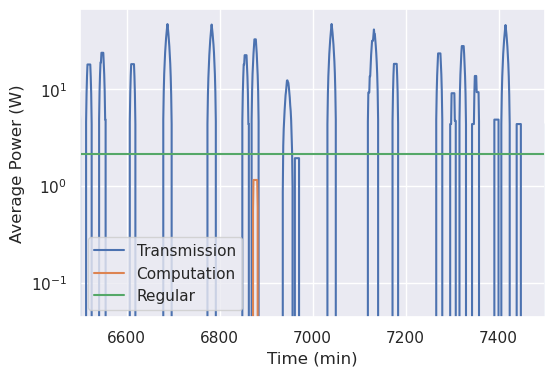

In [7]:
figure, ax=plt.subplots(figsize=(6,4))
plot_energy_vs_time(transmission_energy, ax=ax, name="Transmission", window_size=10)
plot_energy_vs_time(compute_energy, ax=ax, name="Computation", window_size=10)
plot_energy_vs_time(regular_energy, ax=ax, name="Regular", window_size=10)
# plt.plot(total_energy, label='Total Energy')
plt.legend()
plt.xlim(6500,7500)
plt.yscale('log')
plt.savefig('results/plots/energy.pdf', bbox_inches='tight', dpi=300)

In [9]:
sum([x[1] for x in transmission_energy]), sum([x[1] for x in compute_energy]), sum([x[1] for x in regular_energy])

(72271.81230718366, 31.44900000000006, 30672.00000000412)

In [14]:
31.44*100/(31.44*100+72271.8+30672)

0.02963582994463077

In [15]:
72271.8/(31.44*100+72271.8+30672), 30672/(31.44*100+72271.8+30672)

(0.6812451573130935, 0.28911901274227575)